# Collecting User Data, and creating a user graph on Twitter

# Import Packages

In [26]:
# import packages
import tweepy
import yaml
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time

# Read Twitter Authentication Keys

In [51]:
# yaml file reader funtion
def read_yaml(file_path):
    with open(file_path, "r") as f:
        return yaml.safe_load(f)

# yaml config file path
file_path = "twitter_api_key_config.yaml"
# read from config file
api_credential = read_yaml(file_path)

# Create Twitter Authentication

In [45]:
# API authentication
auth = tweepy.OAuthHandler(api_credential["api_key"], \
                           api_credential["api_secret_token"])
auth.set_access_token(api_credential["access_token"], \
                      api_credential["access_token_secret"])
API = tweepy.API(auth, wait_on_rate_limit=True)

# Collect the user's information for the seed of users (using screen_name)

Processing number 1:938514099276787713
Processing number 2:26760298
Processing number 3:2162548866
Processing number 4:4158703699
Processing number 5:829042017283952640
Processing number 6:209970098
Processing number 7:1405282775079522310
Processing number 8:1081039046829400064
Processing number 9:1241485367351500800
Processing number 10:1416495588510625793
Processing number 11:222336970
Processing number 12:1410566938007281664
Processing number 13:473177596
Processing number 14:1412957231612530691
Processing number 15:26762095
Processing number 16:1411217933536317443


Rate limit reached. Sleeping for: 897


Processing number 17:1408680810270633986
Processing number 18:2806154738
Processing number 19:289122155
Processing number 20:1333660536219652097
Processing number 21:384362459
Processing number 22:1379056393290924043
Processing number 23:1349418419670536192
Processing number 24:960639390434385920
Processing number 25:2270776548
Processing number 26:73177978
Processing number 27:1375132359901634561
Processing number 28:26783119
Processing number 29:300198200
Processing number 30:1159924770843975680
Processing number 31:429530134


Rate limit reached. Sleeping for: 896


Processing number 32:996030123324276736
Processing number 33:1164301232099319808
Processing number 34:1050756872444116992
Processing number 35:1340037061286395906
Processing number 36:707585921705639936
Processing number 37:968954132085194753
Processing number 38:1288837450857496576
Processing number 39:1216241412074639360
Processing number 40:858002782669881344
Processing number 41:1531607538
Processing number 42:1137817178294456321
Processing number 43:1240133702795042817
Processing number 44:1644656600
Processing number 45:972542884552601600
Processing number 46:37032459


Rate limit reached. Sleeping for: 896


Processing number 47:370689465
Processing number 48:1329644004963586048
Processing number 49:1192469933562761216
Processing number 50:1171066933
Processing number 51:811266036897038336
Processing number 52:1247594947886206977
Processing number 53:2842185149
Processing number 54:804035433533472771
Processing number 55:1322152738654953473
Processing number 56:997155119618650112
Processing number 57:926943054216404993
Processing number 58:1304241824366604289
Processing number 59:915689023305170944
Processing number 60:1305841601613369345
Processing number 61:1314032108210286593


Rate limit reached. Sleeping for: 895


Processing number 62:1254977227810209792
Processing number 63:69297621
Processing number 64:1273211368259215360
Processing number 65:1246170441393160193
Processing number 66:501284291
Processing number 67:800492024159825920
Processing number 68:1298704457694420993
Processing number 69:898837655890382848
Processing number 70:1301027347374645248
Processing number 71:1963022882
Processing number 72:1298627419046391808
Processing number 73:1296170736592146432
Processing number 74:1295656806300225538
Processing number 75:1269657511323262976
Processing number 76:1160938867379208192


Rate limit reached. Sleeping for: 895


Processing number 77:1141523068910755840
Processing number 78:3386874852
Processing number 79:961928564
Processing number 80:1275838164716814337
Processing number 81:17032442
Processing number 82:437226549
Processing number 83:1619218286
Processing number 84:1249342320853618688
Processing number 85:1271585685078773762
Processing number 86:1263245115302150144
Processing number 87:766239803847442433
Processing number 88:468083548
Processing number 89:42310531
Processing number 90:19231440


Rate limit reached. Sleeping for: 896


Processing number 91:1264358022735953920
Processing number 92:777617058548678657
Processing number 93:1239329780828262401
Processing number 94:245085897
Processing number 95:1099016978985971712
Processing number 96:1222298725365633024
Processing number 97:917403649315299328
Processing number 98:1252468091579031552
Processing number 99:820671586713804801
Processing number 100:1071051494793740288
Processing number 101:1241054203537002498
Processing number 102:439705071
Processing number 103:160414360
Processing number 104:75317710
Processing number 105:1250866872137863168


Rate limit reached. Sleeping for: 896


Processing number 106:125407153
Processing number 107:1102611797004242944
Processing number 108:1245037263743905792
Processing number 109:89475392
Processing number 110:1132045484829302784
Processing number 111:1243552929568579585
Processing number 112:1921989385
Processing number 113:1197642897056661504
Processing number 114:1598898768
Processing number 115:1239941569194549249
Processing number 116:94789469
Processing number 117:2360447187
Processing number 118:1199925101371592704
Processing number 119:1002258076148219904
Processing number 120:1231113955302445056
Processing number 121:363463446


Rate limit reached. Sleeping for: 896


Processing number 122:2988615724
Processing number 123:55159606
Processing number 124:1065066155461685249
Processing number 125:1218292133750165505
Processing number 126:4918865949
Processing number 127:1074394445972365312
Processing number 128:1212093842016485376
Processing number 129:2773542902
Processing number 130:814497376102711296
Processing number 131:18310336
Processing number 132:819018702125342721
Processing number 133:1196789269655719936
Processing number 134:1117313910
Processing number 135:890034513149009920


Rate limit reached. Sleeping for: 897


Processing number 136:480098959
Processing number 137:1138834518985519104
Processing number 138:356489125
Processing number 139:3762858014
Processing number 140:31524646
Processing number 141:1170938329061134336
Processing number 142:4809806580
Processing number 143:828741923460362241
Processing number 144:1181692268131966977
Processing number 145:25410918
Processing number 146:1012044284571234304
Processing number 147:633175973
Processing number 148:1169703080775962624
Processing number 149:1177335625667579905
Processing number 150:1176182408992837639
Processing number 151:293808246


Rate limit reached. Sleeping for: 897


Processing number 152:2723254793
Processing number 153:1156079010306093057
Processing number 154:2281145036
Processing number 155:517152757
Processing number 156:1032679860857057280
Processing number 157:374721149
Processing number 158:1164202148369817600
Processing number 159:1159527636726501376
Processing number 160:809458518
Processing number 161:1100319428149800960
Processing number 162:1151269419072536577
Processing number 163:1152504738111459328
Processing number 164:1156337172988850176
Processing number 165:884640528939098112


Rate limit reached. Sleeping for: 896


Processing number 166:1138849005201383424
Processing number 167:62547220
Processing number 168:26374399
Processing number 169:993588695147016192
Processing number 170:18163032
Processing number 171:706894087488544768
Processing number 172:14595612
Processing number 173:263226169
Processing number 174:1136003405191815175
Processing number 175:186170695
Processing number 176:3632083218
Processing number 177:33591075
Processing number 178:4716034997
Processing number 179:1122912637644181505
Processing number 180:1111765333600337920
Processing number 181:2484344106


Rate limit reached. Sleeping for: 897


Processing number 182:3278737430
Processing number 183:42121779
Processing number 184:405120977
Processing number 185:986686275687153664
Processing number 186:26442402
Processing number 187:1120333501
Processing number 188:1080532878004535296
Processing number 189:826149329475768320
Processing number 190:1098352040110043142
Processing number 191:54236825
Processing number 192:1093389298903089152
Processing number 193:291881746
Processing number 194:1083796373458305025
Processing number 195:1092578009159069697
Processing number 196:608356587


Rate limit reached. Sleeping for: 897


Processing number 197:179183633
Processing number 198:2196836544
Processing number 199:2429834129
Processing number 200:14879023
Processing number 201:1073272895420358656
Processing number 202:42594881
Processing number 203:1059464729939210240
Processing number 204:576623744
Processing number 205:949084312057430016
Processing number 206:1025003857208725504
Processing number 207:752841790881992704
Processing number 208:1055256956099674112
Processing number 209:960720573075668993
Processing number 210:2541905502
Processing number 211:151337879


Rate limit reached. Sleeping for: 896


Processing number 212:593903936
Processing number 213:928053765625798657
Processing number 214:1026785484
Processing number 215:830330359
Processing number 216:363915058
Processing number 217:4843295875
Processing number 218:946499556
Processing number 219:1026167558376894465
Processing number 220:243760388
Processing number 221:3365313132
Processing number 222:496288712
Processing number 223:868734003616112640
Processing number 224:900404894
Processing number 225:1034782728204431360
Processing number 226:917450443768389634


Rate limit reached. Sleeping for: 896


Processing number 227:1032030745034862593
Processing number 228:258668419
Processing number 229:761986497968869376
Processing number 230:467748751
Processing number 231:33444757
Processing number 232:402037468
Processing number 233:1016392519
Processing number 234:790358254681370625
Processing number 235:3163996979
Processing number 236:3311682193
Processing number 237:953646064376070144
Processing number 238:43689579
Processing number 239:1406861328
Processing number 240:878872962216202241


Rate limit reached. Sleeping for: 896


Processing number 241:1009878224988323840
Processing number 242:1004029599234314240
Processing number 243:790173087933145092
Processing number 244:999385987166818304
Processing number 245:1352533891
Processing number 246:986285852350332928
Processing number 247:990290566675025921
Processing number 248:2493439310
Processing number 249:983864231417274368
Processing number 250:2233607454
Processing number 251:363312491
Processing number 252:521191609
Processing number 253:2161520580
Processing number 254:978069660330483712
Processing number 255:742039927


Rate limit reached. Sleeping for: 896


Processing number 256:976968452777787392
Processing number 257:3262115569
Processing number 258:3291282239
Processing number 259:2156950159
Processing number 260:575881431
Processing number 261:326489106
Processing number 262:832685927495409664
Processing number 263:432083617
Processing number 264:951593812089978880
Processing number 265:249311962
Processing number 266:90794640
Processing number 267:958474486310780928
Processing number 268:46455548
Processing number 269:948448790532407297
Processing number 270:41799537
Processing number 271:1959641286


Rate limit reached. Sleeping for: 896


Processing number 272:1700697901
Processing number 273:873600671261507584
Processing number 274:2559405968
Processing number 275:942112966102495232
Processing number 276:131872671
Processing number 277:760533722315694080
Processing number 278:186280286
Processing number 279:85607350
Processing number 280:925898338251161605
Processing number 281:2342199572
Processing number 282:935581341219016704
Processing number 283:28274841
Processing number 284:443213226
Processing number 285:915247423064174593
Processing number 286:879332986780516357


Rate limit reached. Sleeping for: 896


Processing number 287:38064401
Processing number 288:278191100
Processing number 289:3904598533
Processing number 290:107227445
Processing number 291:915067345642577920
Processing number 292:908295860202618885
Processing number 293:905173797220659200
Processing number 294:127899523
Processing number 295:2710655911
Processing number 296:897871021390258176
Processing number 297:820703291549941760
Processing number 298:2490618758
Processing number 299:883349730423525379
Processing number 300:839603110184026112
Processing number 301:888065475564916740


Rate limit reached. Sleeping for: 896


Processing number 302:728227622564421636
Processing number 303:15110220
Processing number 304:4219929538
Processing number 305:873662605591683073
Processing number 306:790845059168145408
Processing number 307:85171106
Processing number 308:2991747722
Processing number 309:221525595
Processing number 310:1154352122
Processing number 311:917622691
Processing number 312:847625577188139011
Processing number 313:784162579790692352
Processing number 314:849004989108203521
Processing number 315:2544459834
Processing number 316:849452498217836544


Rate limit reached. Sleeping for: 896


Processing number 317:829896146474647553
Processing number 318:180489994
Processing number 319:827389458303447040
Processing number 320:177696530
Processing number 321:768119307452768256
Processing number 322:800761129098055681
Processing number 323:810513366112407552
Processing number 324:816921039296827392
Processing number 325:818681771088904192
Processing number 326:600491157
Processing number 327:27398665
Processing number 328:703561088
Processing number 329:17972520
Processing number 330:750764406200410112
Processing number 331:628507825


Rate limit reached. Sleeping for: 896


Processing number 332:3308590823
Processing number 333:803480590682968064
Processing number 334:2485652185
Processing number 335:2463630398
Processing number 336:784868627379920896
Processing number 337:778938804413476865
Processing number 338:184522740
Processing number 339:799324030004301824
Processing number 340:715224555850084352
Processing number 341:2387799446
Processing number 342:254707873
Processing number 343:629690108
Processing number 344:318658298
Processing number 345:21157727


Rate limit reached. Sleeping for: 896


Processing number 346:49177896
Processing number 347:21205025
Processing number 348:14245630
Processing number 349:2950952113
Processing number 350:743065844285071360
Processing number 351:2405504605
Processing number 352:3760893973
Processing number 353:776208200496390144
Processing number 354:766296248144039936
Processing number 355:706879552925147136
Processing number 356:763057325347213314
Processing number 357:762203966071382016
Processing number 358:76236858
Processing number 359:3187147140
Processing number 360:586756221
Processing number 361:612155334


Rate limit reached. Sleeping for: 897


Processing number 362:2715450990
Processing number 363:2614210579
Processing number 364:754164746857832448
Processing number 365:1562552076
Processing number 366:4029531
Processing number 367:299847513
Processing number 368:734970173933780993
Processing number 369:3760870513
Processing number 370:26823266
Processing number 371:316366534
Processing number 372:41057598
Processing number 373:17165701
Processing number 374:25048900
Processing number 375:356347929


Rate limit reached. Sleeping for: 896


Processing number 376:2163628008
Processing number 377:15973341
Processing number 378:702800430716157952
Processing number 379:716706118723100672
Processing number 380:2249210094
Processing number 381:155689518
Processing number 382:705898425401757696
Processing number 383:1378571413
Processing number 384:3508516332
Processing number 385:58913811
Processing number 386:4849598183
Processing number 387:3248185111
Processing number 388:250858290
Processing number 389:36965867
Processing number 390:1511493282


Rate limit reached. Sleeping for: 897


Processing number 391:19467217
Processing number 392:48160244
Processing number 393:4635630194
Processing number 394:1000818187
Processing number 395:4577967254
Processing number 396:23517538
Processing number 397:4186676651
Processing number 398:4037586614
Processing number 399:3075537595
Processing number 400:3264486080
Processing number 401:50895074
Processing number 402:3986249774
Processing number 403:819847682
Processing number 404:1581101690
Processing number 405:32181218


Rate limit reached. Sleeping for: 897


Processing number 406:52739552
Processing number 407:191040191
Processing number 408:3607394234
Processing number 409:2901339814
Processing number 410:325271044
Processing number 411:62850842
Processing number 412:2379159594
Processing number 413:3399183258
Processing number 414:605762663
Processing number 415:463121553
Processing number 416:2905454354
Processing number 417:1202697187
Processing number 418:2858600581
Processing number 419:278644791
Processing number 420:3279289315
Processing number 421:3377875948


Rate limit reached. Sleeping for: 896


Processing number 422:323488027
Processing number 423:2779444992
Processing number 424:366862583
Processing number 425:407302658
Processing number 426:69327019
Processing number 427:399654233
Processing number 428:127657228
Processing number 429:2795375066
Processing number 430:3195613783
Processing number 431:851531912
Processing number 432:3038631457
Processing number 433:15208020
Processing number 434:2190513536
Processing number 435:1273203624
Processing number 436:2594324894


Rate limit reached. Sleeping for: 897


Processing number 437:1029853783
Processing number 438:17358507
Processing number 439:3153465193
Processing number 440:3147005377
Processing number 441:82726291
Processing number 442:2707185620
Processing number 443:1963665277
Processing number 444:2799128977
Processing number 445:1599815107
Processing number 446:2783049877
Processing number 447:202817955
Processing number 448:38348343
Processing number 449:38098192
Processing number 450:2727489163
Processing number 451:2624845866


Rate limit reached. Sleeping for: 897


Processing number 452:268993360
Processing number 453:740996906
Processing number 454:536713585
Processing number 455:950575855
Processing number 456:1223050310
Processing number 457:2178801661
Processing number 458:2838118517
Processing number 459:2900688630
Processing number 460:1839890054
Processing number 461:2707146684
Processing number 462:2878690704
Processing number 463:1425830270
Processing number 464:174789042
Processing number 465:480701996


Rate limit reached. Sleeping for: 896


Processing number 466:1123117400
Processing number 467:2786848362
Processing number 468:2406170809
Processing number 469:2823534019
Processing number 470:2651546600
Processing number 471:1603717801
Processing number 472:2751468360
Processing number 473:2741310415
Processing number 474:2735489634
Processing number 475:58487610
Processing number 476:2669488652
Processing number 477:13362212
Processing number 478:211628224
Processing number 479:1865804052
Processing number 480:2337950156


Rate limit reached. Sleeping for: 896


Processing number 481:2535531242
Processing number 482:238703839
Processing number 483:1631115667
Processing number 484:2426328457
Processing number 485:2508104672
Processing number 486:1517432839
Processing number 487:203121291
Processing number 488:2434560350
Processing number 489:65753163
Processing number 490:991548360
Processing number 491:2422476492
Processing number 492:759458538
Processing number 493:338746162
Processing number 494:2378992454
Processing number 495:2377841023
Processing number 496:1205755933


Rate limit reached. Sleeping for: 896


Processing number 497:1260499039
Processing number 498:234516856
Processing number 499:741282684
Processing number 500:406735230
Athanas64134475
flyingstarcafe
ICNurses
janicenapoleon1
unmfrdo
jericksanatomy
billmcnutt1934
GUriasSandoval
HJamesRN
tv_nursing
AACNursing
YenNguy79154955
FaknilO
_saavedrad
SatelliteCoffee
barbra60239455
SebastinAbrant1
bfadvocate
spenmich
CriticalComfort
NuLaydie
FieldPlacement
RechargeNM
WesternSkyCC
6thMRB
unmdei
HDDoppler
larranag
chrisortiz5
JoseM_Cerrato
TheresaHroncich
SkillsUSANM
nmhighered
ESolutionsNM
NMClinCoalition
sfc_kent_santos
RGMindfulness
GaskinKristi
Shushbito
NMNPCouncil
lday0587
MarisaShapiro
Jennife89753558
cecilianowell
NurseRiceBall
ealtmanmd
BrooklineEdu
Nurse_Herica
teachmolina
BairMedicalSpa
Master_IPA
UNMCCC
sandiacarol
DougZiedonisMD
LisaLangan9
RosieDNP
CaitlinW_RN
KimberlyMSN_RN
PAGSA_UNM
_llynnea
LardierHeather
AdrieBoulton
Grovva_Sam
unmscprez21
LizCollins____
NursingCAS
senecaannelsey
DrLisaDMDiva1
EOndoa
AsunmElections
UNM

ModuleNotFoundError: No module named 'scipy'

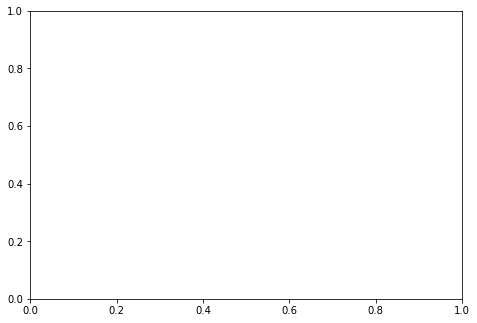

In [65]:
unm_sn = "UNM_CON"
user_obj = API.get_user(screen_name=unm_sn)

unm_followers_ids = API.get_follower_ids(screen_name=unm_sn)

def is_protected(uid):
    obj = API.get_user(user_id=uid)
    return not obj._json['protected']

filtered_followers = list(filter(is_protected,unm_followers_ids))

node_set = filtered_followers[0:500]

graph = []
count = 0

for num in range(0,500):
    count = count + 1
    print("Processing number " + str(count) + ":" + str(node_set[num]))
    following_ids = API.get_friend_ids(user_id=node_set[num])
        
    row_array = np.zeros(500).tolist()
    
    for index in range(0,500):
        if index == num:
             row_array[index] = 1
        else:
            if node_set[index] in following_ids:
                row_array[index] = 1
            else:
                row_array[index] = 0
    
    graph.append(row_array)
    


labels = {}
                
for k in range(0,500):
    obj = API.get_user(user_id=node_set[k])
    labels[k] = obj._json['screen_name']
    print(obj._json['screen_name'])
                
                
print(graph)

## Save labels to a text file

In [74]:
a_file = open("labels.txt", "w")
the_array = np.array(list(labels.values()))
for element in the_array:
    a_file.write(element + "\n")
a_file.close()

## Save matrix to a file 

In [76]:
np.savetxt("adjmatrix.csv", np_graph, delimiter=",")

## Plot Graph

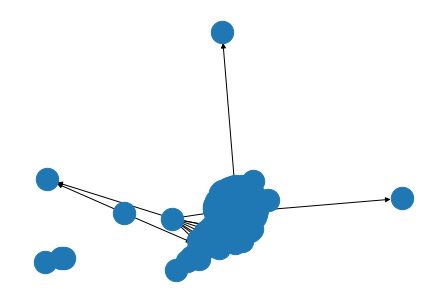

In [99]:
def show_graph_with_labels(adjacency_matrix,mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(list(edges))
    nx.draw(gr, node_size=500)#, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(np_graph,labels)

## Remove any self-pointing edges on the data, and plot the graph

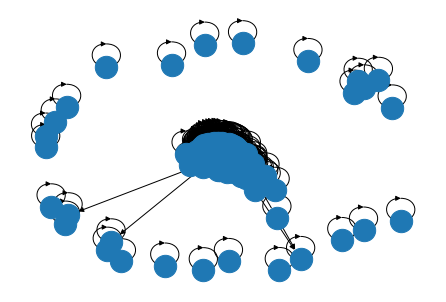

In [107]:
corrected_gr = np_graph

for i in range(0,500):
    for j in range(0,500):
        if i == j:
            corrected_gr[i][j] = 0
            
show_graph_with_labels(corrected_gr,labels)

## Save the corrected graph in a separate file 

In [84]:
np.savetxt("cadjmatrix.csv", corrected_gr, delimiter=",")

## Run PageRank with a random walk, and the original function PageRank from the NetworkX Library

In [162]:
import random

def create_graph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(list(edges))
    return gr

# Sort the nodes
def nodes_sorted(g, points):
    t = np.array(points)
    t = np.argsort(-t)
    return t
  
# Distribute points randomly in a graph
def random_Walk(g):
    rwp = [0 for i in range(g.number_of_nodes())]
    nodes = list(g.nodes())
    r = random.choice(nodes)
    rwp[r] += 1
    neigh = list(g.out_edges(r))
    z = 0
      
    while (z != 10000):
        if (len(neigh) == 0):
            focus = random.choice(nodes)
        else:
            r1 = random.choice(neigh)
            focus = r1[1]
        rwp[focus] += 1
        neigh = list(g.out_edges(focus))
        z += 1
    return rwp
  
    
# Main
# 1. Create a directed graph with N nodes
g = create_graph(np_graph)
  
# 2. perform a random walk
points = random_Walk(g)
  
# 3. Get nodes rank according to their random walk points
sorted_by_points = nodes_sorted(g, points)
print("PageRank using Random Walk Method")
print(sorted_by_points)
  
# p_dict is a dictionary of tuples
p_dict = nx.pagerank(g)
p_sort = sorted(p_dict.items(), key=lambda x: x[1], reverse=True)
  
print("PageRank using inbuilt pagerank method")
for i in p_sort:
    print(i[0], end=", ")

PageRank using Random Walk Method
[437 425 481 499 133 462 388 497 384 470 387 454 455 486 440 484 422 343
 450 432 405 491 347 498 487 496 413 280 446 463 317 298 402 247 118 108
 410 283 444 166 407 336 278 460 424 433 309 376 399 313 380  14 319 289
 479  25 488 492 441 155 149 495 102 163 386 389 482 461   1 458  70 467
 154 264 124 417 431 404 245 466  95 483 171 178 403 459 430 262 267  32
 302 217 333 408 325 209 383 227 200 240  85 288 295  84 337 202 139 397
 442 353  75 287 351 218 157 315 304 158 445  53   4 434 256  72  51  69
 181 277 284 377 238 132 443  91 476  58 396  94  63 150 418 156 394 352
 320 414 390 176 452 448  93 141 435 419 193 398 321 453 290 255 369 427
 371 146 312 308 105  12 110 493 282 189 468 148 366 400 318 219 122   8
 472  13 429  29 234 328 375 292 159 109 188 180 115 258 111  96 113 350
 235 167 201  10  34 362 395 322 316  57 478 213  36 192 299  23 401 106
 203 130  41  31 339 374 367 121 220  22 490  18   7 474 251 101  42 281
  80 341  47 457 

## Print the screenname of the highest ranked nodes by both algorithms

In [1]:
count = 0
print("Ranking of nodes using Random Walk Algorithm")

for element in range(0,15):
    count = count + 1
    print("Number " + str(count) + ":" + labels[sorted_by_points[element]])

count = 0
print("\nRanking of nodes using built-in NetworkXs PageRank")

for element in range(0,15):
    count = count + 1
    print("Number " + str(count) + ":" + labels[p_sort[element][0]])

Ranking of nodes using Random Walk Algorithm


NameError: name 'labels' is not defined

## Compute the betweeness centrality for each node on the graph using NetworkX

In [159]:
bc_list = nx.betweenness_centrality(g)
bc_sort = sorted(bc_list.items(), key=lambda x: x[1], reverse=True)
print(bc_sort)

[(437, 0.11054612589882286), (455, 0.08849082371027216), (298, 0.045292355823098804), (389, 0.03351187772917358), (133, 0.033034842463446554), (146, 0.031329401738957194), (111, 0.028162212522747938), (280, 0.022554051329843464), (382, 0.020549152115818405), (53, 0.018542186254044236), (218, 0.0181960498257991), (223, 0.01796493342189574), (489, 0.016363683566821403), (328, 0.015515941779054769), (29, 0.014663842903345381), (462, 0.01412144204491847), (388, 0.013170859590583617), (10, 0.011997961722074168), (306, 0.0114977759175451), (470, 0.011415507955399128), (432, 0.011260848696621788), (481, 0.01125622509721995), (484, 0.011066170108210028), (482, 0.010770433108326712), (181, 0.010602899018427592), (14, 0.010053620873608926), (121, 0.009618260609416151), (387, 0.009485227075637275), (264, 0.009324738145331477), (141, 0.008913324295154536), (410, 0.008544518487526962), (247, 0.008365340828491942), (309, 0.008002229828016108), (425, 0.007835439716353372), (347, 0.007791351243968029)

## Print the screen_names of the nodes with the highest betweenness centrality

In [164]:
count = 0
print("\nRanking of nodes by Betweenness Centrality")

for element in range(0,5):
    count = count + 1
    print("Number " + str(count) + ":" + labels[bc_sort[element][0]])


Ranking of nodes by Betweenness Centrality
Number 1:UNM
Number 2:BernCounty
Number 3:UNMHospital
Number 4:ProjectECHO
Number 5:PresidentStokes
